#### Цель проекта:
---

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике и определиться с параметрами будущей модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика


#### Задачи проекта:
---

- Провести первичную обработку данных. 

- Оценить распределение признака для числовых переменных, устранить выбросы.

- Оценить количество уникальных значений для номинативных переменных.

- Преобразовать данные.

- Провести корреляционный анализ количественных переменных, отобрать не коррелирующие переменные.

- Проанализировать номинативные переменные и устранить не влияющие на переменную score.

- Сформулировать выводы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 400) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')

In [2]:
from jupyterthemes import jtplot
jtplot.style()

### Первичный анализ

In [3]:
display(math.head(20))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
def get_stat_dif(column):
    '''Student's test'''
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_boxplot(column):
    '''Makes a boxplot for the column'''
    fig, ax = plt.subplots(figsize = (5, 5))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])])
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## school
---
аббревиатура школы, в которой учится ученик

In [5]:
print(math.school.unique())

['GP' 'MS']


In [6]:
pd.DataFrame(math.school.value_counts())

,school
GP,349
MS,46


*У данного показателя всего два уникальных значения, то есть данные собирались в двух школах. Так как об этиш школах ничего больше не известно, на основе этой информации невозможно строить какие-либо выводы, полезные для будущей модели - но я его использую для заполнения пустых строк в address*

In [7]:
# math.drop(['school'], inplace = True, axis = 1)

## sex
---
пол ученика ('F' - женский, 'M' - мужской)

In [8]:
print(math.sex.unique())

['F' 'M']


In [9]:
pd.DataFrame(math.sex.value_counts())

,sex
F,208
M,187


*Всё ок, пустых значений нет, значения распределены почти поровну*

## age
---
возраст ученика (от 15 до 22)

In [10]:
print(math.age.unique())

[18 17 15 16 19 22 20 21]


In [11]:
pd.DataFrame(math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

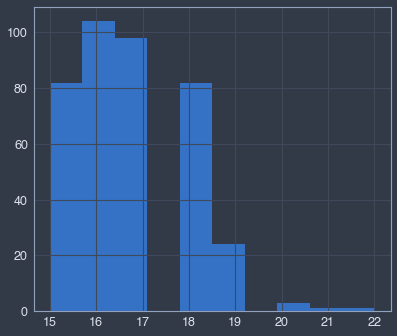

In [12]:
math.age.hist()
math.age.describe()

*Пустых значений нет*

In [13]:
age_median = math.age.median()
age_IQR = math.age.quantile(0.75) - math.age.quantile(0.25)
age_perc25 = math.age.quantile(0.25)
age_perc75 = math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(age_perc25), '75-й перцентиль: {},'.format(age_perc75)
      , "IQR: {}, ".format(age_IQR),"Границы выбросов: [{f}, {l}].".format(f=age_perc25 - 1.5*age_IQR, l=age_perc75 + 1.5*age_IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


*Выбросы обнаружены, однако оставлю значение 22, оно вполне вписывается в возможный возраст ученика*

## address
---
тип адреса ученика ('U' - городской, 'R' - за городом)

In [14]:
print(math.address.unique())

['U' nan 'R']


In [15]:
# заменяем nan на None 
math.address = math.address.apply(lambda x: None if pd.isnull(x) else x)

In [16]:
pd.DataFrame(math.address.value_counts())

,address
U,295
R,83


*Всё ок, но есть 17 пустых значений. Можно предположить (изучив датасет), что еесли код школы GP - ученик скорее городской, а если MS - скорее за городом. Для сравнения - значения столбца school:*

In [17]:
pd.DataFrame(math.school.value_counts())

,school
GP,349
MS,46


In [18]:
# заменим None на соответствующие значения
math.loc[((math['address'].isnull()) & (math['school'] == 'GP')), 'address'] = 'U'
math.loc[((math['address'].isnull()) & (math['school'] == 'MS')), 'address'] = 'R'

## famsize
---
размер семьи ('LE3' <= 3, 'GT3' >3)

In [19]:
print(math.famsize.unique())

[nan 'GT3' 'LE3']


In [20]:
# заменяем nan на None 
math.famsize = math.famsize.apply(lambda x: None if pd.isnull(x) else x)

In [21]:
pd.DataFrame(math.famsize.value_counts())

,famsize
GT3,261
LE3,107


*Всё ок, 27 пустых - предположим, что чем больше семья, тем хуже внутри нее отношения*

In [22]:
math.loc[((math['famsize'].isnull()) & (math['famrel'] > 3 )), 'famsize'] = 'LE3'
math.loc[((math['famsize'].isnull()) & (math['famrel'] <= 3 )), 'famsize'] = 'GT3'

## Pstatus
---
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [23]:
print(math.Pstatus.unique())

['A' nan 'T']


In [24]:
# заменяем nan на None 
math.Pstatus = math.Pstatus.apply(lambda x: None if pd.isnull(x) else x)

In [25]:
pd.DataFrame(math.Pstatus.value_counts())

,Pstatus
T,314
A,36


*45 пустых значений. Предположим, что если размер семьи >3, то родители живут вместе.*

In [26]:
math.loc[((math['Pstatus'].isnull()) & (math['famsize'] == 'GT3')), 'Pstatus'] = 'T'
math.loc[((math['Pstatus'].isnull()) & (math['famsize'] == 'LE3')), 'Pstatus'] = 'A'

In [27]:
pd.DataFrame(math.Pstatus.value_counts())

,Pstatus
T,343
A,52


In [28]:
math.Pstatus.count()

395

## Medu
---
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
print(math.Medu.unique())

[ 4.  1.  3.  2. nan  0.]


In [30]:
pd.DataFrame(math.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

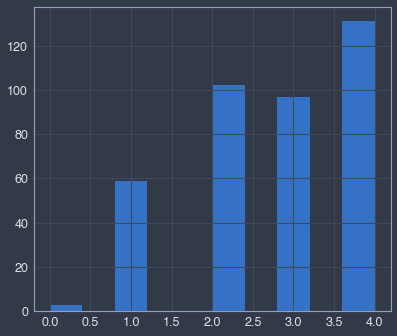

In [31]:
math.Medu.hist()
math.Medu.describe()

*3 пустых значения, заполним модой - 4*

In [32]:
math.loc[(math['Medu'].isnull()), 'Medu'] = 4

In [33]:
print(math.Medu.unique())

[4. 1. 3. 2. 0.]


In [34]:
pd.DataFrame(math.Medu.value_counts())

,Medu
4.0,134
2.0,102
3.0,97
1.0,59
0.0,3


## Fedu
---
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [35]:
print(math.Fedu.unique())

[ 4.  1.  2.  3. 40. nan  0.]


In [36]:
pd.DataFrame(math.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


*Очевидно, 40 - это ошибка*

In [37]:
math.loc[(math['Fedu'] == 40), 'Fedu'] = 4
print(math.Fedu.unique())

[ 4.  1.  2.  3. nan  0.]


*24 пустых значения. Посмотрим на корреляцию Fedu и Medu*

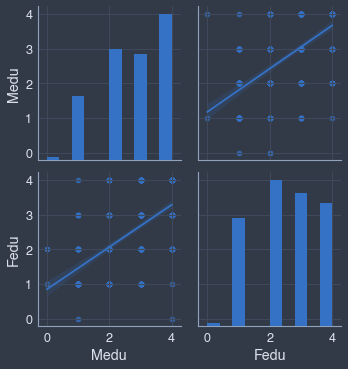

In [38]:
sns.pairplot(math, vars=['Medu', 'Fedu'], kind = 'reg')

*По графикам видно, что образование отца и матери сильно коррелируют. Попробуем заполнить недостающие значения, сравнив с Medu*

In [39]:
math.loc[(math['Fedu'].isnull()), 'Fedu'] = math['Medu']

count    395.000000
mean       2.546835
std        1.092061
min        0.000000
25%        2.000000
50%        3.000000
75%        3.500000
max        4.000000
Name: Fedu, dtype: float64

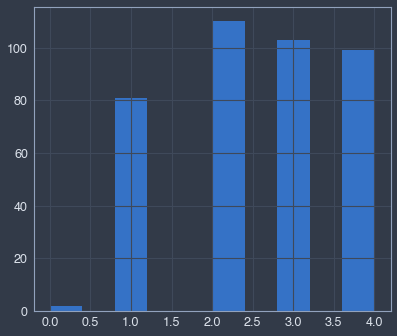

In [40]:
math.Fedu.hist()
math.Fedu.describe()

In [41]:
pd.DataFrame(math.Fedu.value_counts())

,Fedu
2.0,110
3.0,103
4.0,99
1.0,81
0.0,2


## Mjob
---
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [42]:
pd.DataFrame(math.Mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [43]:
print(math.Mjob.unique())

['at_home' 'health' 'other' 'services' 'teacher' nan]


In [44]:
math.Mjob = math.Mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

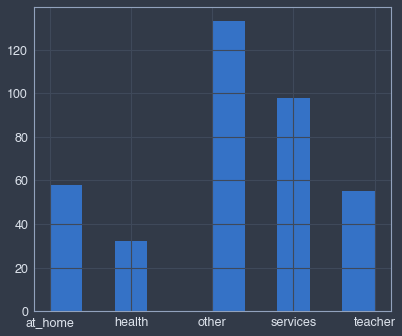

In [45]:
math.Mjob.hist()

*Всё ок, но 19 пустых. Предположим, что матери с низким уровнем образования занимаются домохозяйством. Осатльные строки заполню модой - other*

In [46]:
math.loc[((math['Mjob'].isnull()) & (math['Medu'] <= 2 )), 'Mjob'] = 'at_home'
math.loc[(math['Mjob'].isnull()), 'Mjob'] = 'other'

In [47]:
pd.DataFrame(math.Mjob.value_counts())

,Mjob
other,146
services,98
at_home,64
teacher,55
health,32


## Fjob
---
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [48]:
print(math.Fjob.unique())

['teacher' 'other' nan 'health' 'services' 'at_home']


In [49]:
math.Fjob = math.Fjob.apply(lambda x: None if pd.isnull(x) else x)

In [50]:
pd.DataFrame(math.Fjob.value_counts())

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


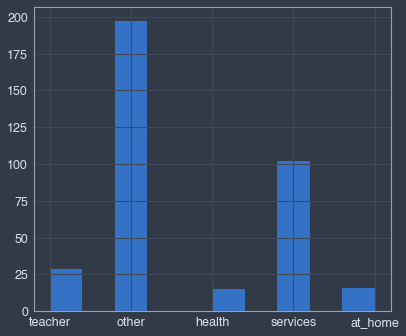

In [51]:
math.Fjob.hist()

*36 пустых значений, заполним модой*

In [52]:
math.loc[(math['Fjob'].isnull()), 'Fjob'] = 'other'

## reason
---
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [53]:
print(math.reason.unique())

['course' 'other' 'home' 'reputation' nan]


In [54]:
math.reason = math.reason.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [55]:
pd.DataFrame(math.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


*Всё ок, 17 пустых. Предположим, что если путь до школы короткий, то это и есть причина выбора школы. Остальное заполним модой*

In [56]:
math.loc[((math['reason'].isnull()) & (math['traveltime'] <= 2 )), 'reason'] = 'home'
math.loc[(math['reason'].isnull()), 'reason'] = 'course'

## guardian
---
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [57]:
print(math.guardian.unique())

['mother' 'father' 'other' nan]


In [58]:
math.guardian = math.guardian.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x)

In [59]:
print(math.guardian.unique())

['mother' 'father' 'other' None]


In [60]:
pd.DataFrame(math.guardian.value_counts())

,guardian
mother,250
father,86
other,28


*31 пустое. Изучив датасет, можем предположить, что если поддержки семьи нет то опекун - отец*

In [61]:
math.loc[((math['guardian'].isnull()) & (math['famsup'] == 'no' )), 'guardian'] = 'father'
math.loc[(math['guardian'].isnull()), 'guardian'] = 'mother'

## traveltime
---
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [62]:
print(math.traveltime.unique())

[ 2.  1.  3. nan  4.]


In [63]:
pd.DataFrame(math.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


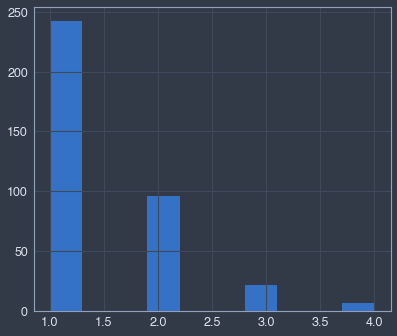

In [64]:
math.traveltime.hist()

*28 empty. Заполним модой пустые ячейки*

In [65]:
math.loc[(math['traveltime'].isnull()), 'traveltime'] = 1

## studytime
---
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [66]:
print(math.studytime.unique())

[ 2.  3.  1. nan  4.]


In [67]:
pd.DataFrame(math.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


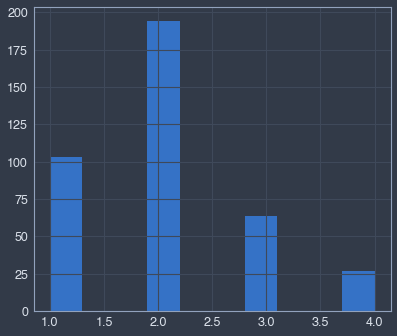

In [68]:
math.studytime.hist()

*7 empty*

*! studytime, granular column looks like completely correlated*

**studytime, granular** удалена в процессе анализа

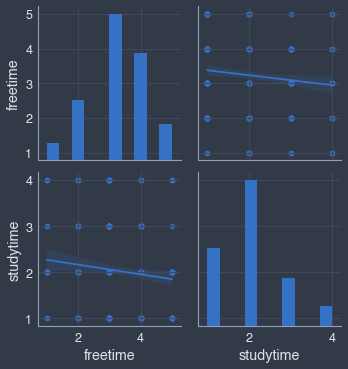

In [69]:
sns.pairplot(math, vars=['freetime', 'studytime'], kind = 'reg')

In [70]:
math.studytime.corr(math.freetime)

-0.12196921845595665

*То есть, можно предположить, что чем больше свободного времени остается, тем меньше ученик занимается*

In [71]:
math.loc[(math['studytime'].isnull()), 'studytime'] = (- math['freetime'] + 5)

## failures
---
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [72]:
print(math.failures.unique())

[ 0.  3. nan  2.  1.]


In [73]:
pd.DataFrame(math.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


*22 empty. Заполним самым частым - 0*

In [74]:
math.loc[(math['failures'].isnull()), 'failures'] = 0

## schoolsup
---
дополнительная образовательная поддержка (yes или no)

In [75]:
print(math.schoolsup.unique())

['yes' 'no' nan]


In [76]:
math.schoolsup = math.schoolsup.apply(lambda x: None if pd.isnull(x) else x)

In [77]:
print(math.schoolsup.unique())

['yes' 'no' None]


In [78]:
pd.DataFrame(math.schoolsup.value_counts())

,schoolsup
no,335
yes,51


*9 empty. Заполним значением "no", так как оно встречается наиболее часто*

In [79]:
math.loc[(math['schoolsup'].isnull()), 'schoolsup'] = 'no'

## famsup
---
семейная образовательная поддержка (yes или no)

In [80]:
print(math.famsup.unique())

['no' 'yes' nan]


In [81]:
math.famsup = math.famsup.apply(lambda x: None if pd.isnull(x) else x)
print(math.famsup.unique())

['no' 'yes' None]


In [82]:
pd.DataFrame(math.famsup.value_counts())

,famsup
yes,219
no,137


*Предположим, что если размер семьи >3, то famsup == 'yes', а если меньше, famsup == 'no'*

In [83]:
math.loc[((math['famsup'].isnull()) & (math['famsize'] == 'GT3')), 'famsup'] = 'yes'
math.loc[((math['famsup'].isnull()) & (math['famsize'] == 'LE3')), 'famsup'] = 'no'

## paid
---
дополнительные платные занятия по математике (yes или no)

In [84]:
print(math.paid.unique())

['no' nan 'yes']


In [85]:
math.paid = math.paid.apply(lambda x: None if pd.isnull(x) else x)
print(math.paid.unique())

['no' None 'yes']


In [86]:
pd.DataFrame(math.paid.value_counts())

,paid
no,200
yes,155


*Допустим, если школа не оказывает поддержки, то ребенку нужны будут дополнительные занятия по математике*

In [87]:
math.loc[((math['paid'].isnull()) & (math['schoolsup'] == 'yes')), 'paid'] = 'no'
math.loc[((math['paid'].isnull()) & (math['schoolsup'] == 'no')), 'paid'] = 'yes'

## activities
---
дополнительные внеучебные занятия (yes или no)

In [88]:
print(math.activities.unique())

['no' 'yes' nan]


In [89]:
math.activities = math.activities.apply(lambda x: None if pd.isnull(x) else x)
print(math.activities.unique())

['no' 'yes' None]


In [90]:
pd.DataFrame(math.activities.value_counts())

,activities
yes,195
no,186


*В данном случае, если ребенок тратит много времени на учебу вне школы и при этом у него остается много свободного врмени, то, скорее всего, в школе он не посещает дополнительные занятия*

In [91]:
math.loc[((math['paid'].isnull()) & (math['freetime'] + math['studytime'] >= 6)), 'paid'] = 'no'
math.loc[math['paid'].isnull(), 'paid'] = 'yes'

## nursery
---
посещал детский сад (yes или no)

In [92]:
print(math.nursery.unique())

['yes' 'no' nan]


In [93]:
math.nursery = math.nursery.apply(lambda x: None if pd.isnull(x) else x)
print(math.nursery.unique())

['yes' 'no' None]


In [94]:
pd.DataFrame(math.nursery.value_counts())

,nursery
yes,300
no,79


*Заполним пропуски самым частым значением*

In [95]:
math.loc[math['nursery'].isnull(), 'nursery'] = 'yes'

## higher
---
хочет получить высшее образование (yes или no)

In [96]:
print(math.higher.unique())

['yes' nan 'no']


In [97]:
math.higher = math.higher.apply(lambda x: None if pd.isnull(x) else x)
print(math.higher.unique())

['yes' None 'no']


In [98]:
pd.DataFrame(math.higher.value_counts())

,higher
yes,356
no,19


*Заполним пропуски самым частым значением*

In [99]:
math.loc[math['higher'].isnull(), 'higher'] = 'yes'

## internet
---
наличие интернета дома (yes или no)

In [100]:
print(math.internet.unique())

[nan 'yes' 'no']


In [101]:
math.higher = math.higher.apply(lambda x: None if pd.isnull(x) else x)
print(math.higher.unique())

['yes' 'no']


In [102]:
pd.DataFrame(math.internet.value_counts())

,internet
yes,305
no,56


*34 пустых*

In [103]:
math.loc[math['internet'].isnull(), 'internet'] = 'yes'

## romantic
---
в романтических отношениях (yes или no)

In [104]:
math.romantic = math.romantic.apply(lambda x: None if pd.isnull(x) else x)
print(math.romantic.unique())

['no' None 'yes']


In [105]:
pd.DataFrame(math.romantic.value_counts())

,romantic
no,240
yes,124


*31 пустое. Заполним пропуски исходя из свободного времени ученика*

In [106]:
math.loc[(math['romantic'].isnull() & (math['freetime'] <= 3)), 'romantic'] = 'no'
math.loc[(math['romantic'].isnull()), 'romantic'] = 'yes'

## famrel
---
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [107]:
print(math.famrel.unique())

[ 4.  5.  3. nan -1.  2.  1.]


In [108]:
math = math.loc[math.famrel >= 1]

In [109]:
print(math.famrel.unique())

[4. 5. 3. 2. 1.]


In [110]:
pd.DataFrame(math.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


*27 empty, заполним модой*

In [111]:
math.loc[(math['famrel'].isnull()), 'famrel'] = 4

/Users/lyosik/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## freetime
---
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [112]:
print(math.freetime.unique())

[ 3.  2.  4.  1.  5. nan]


In [113]:
pd.DataFrame(math.freetime.value_counts())

,freetime
3.0,141
4.0,105
2.0,58
5.0,36
1.0,17


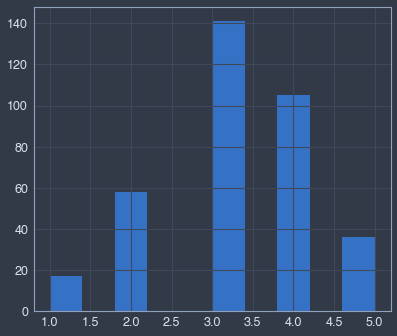

In [114]:
math.freetime.hist()

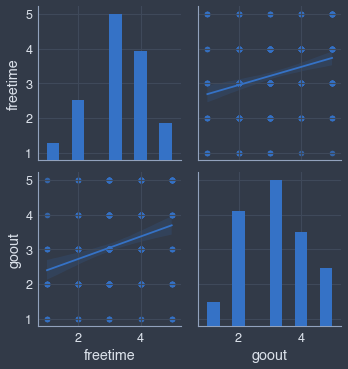

In [115]:
sns.pairplot(math, vars=['freetime', 'goout'], kind = 'reg')

In [116]:
math.goout.corr(math.freetime)

0.2905314723196075

*Очевидно, есть связь между свободным временем после школы и временем, проводимым с друзьями. Попробую заменить пустые значения на значения из коррелирующего столбца.*

In [117]:
math.loc[(math['freetime'].isnull()), 'freetime'] = math['goout']

/Users/lyosik/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## goout
---
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [118]:
print(math.goout.unique())

[ 4.  3.  2.  1.  5. nan]


In [119]:
# По аналогии с предыдущим столбцом заменю пустые строки на значения из freetime 
math.loc[(math['goout'].isnull()), 'goout'] = math['freetime']

In [120]:
pd.DataFrame(math.goout.value_counts())

,goout
3.0,125
2.0,94
4.0,78
5.0,49
1.0,21


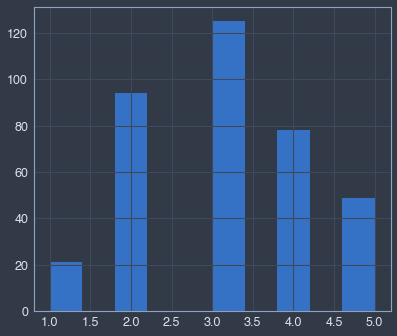

In [121]:
math.goout.hist()

## health
---
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [122]:
print(math.health.unique())

[ 3.  5.  1.  2.  4. nan]


In [123]:
pd.DataFrame(math.health.value_counts())

,health
5.0,120
3.0,87
4.0,60
1.0,43
2.0,42


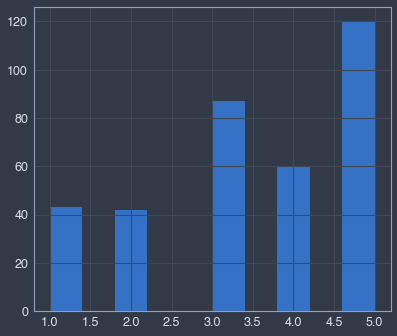

In [124]:
math.health.hist()

*15 empty*

In [125]:
math.loc[(math['health'].isnull()), 'health'] = 5

/Users/lyosik/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## absences
---
количество пропущенных занятий

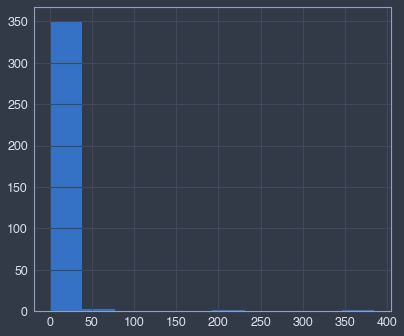

In [126]:
math.absences.describe()
math.absences.hist()

*Очевидно, основная часть значений лежит где-то в промежутке от 0 до 50, остальное можно считать выбросами. Посчитаем:*

In [127]:
median = math.absences.median()
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [128]:
# отсеяла значения, превышающие верхнюю границу выбросов
math = math.loc[math.absences <= 20]

## score
---
баллы по госэкзамену по математике

In [129]:
print(math.score.unique())

[ 30.  50.  75.  55.  45.  60.  80.  70.  25.  85.  90.  65. 100.  35.
  40.  95.   0.  nan]


In [130]:
pd.DataFrame(math.score.value_counts())

,score
50.0,51
55.0,40
0.0,33
65.0,28
60.0,28
75.0,27
40.0,23
70.0,23
45.0,20
80.0,16


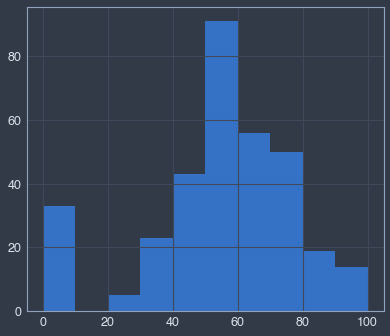

In [131]:
math.score.hist()

25-й перцентиль: 41.25, 75-й перцентиль: 65.0, IQR: 23.75,  Границы выбросов: [5.625, 100.625].


No handles with labels found to put in legend.


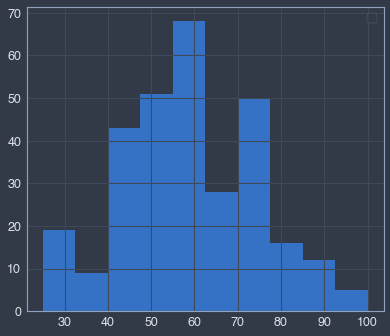

In [132]:
sc_median = math.score.median()
sc_IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
sc_perc25 = math.score.quantile(0.25)
sc_perc75 = math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(sc_perc25), '75-й перцентиль: {},'.format(sc_perc75)
      , "IQR: {}, ".format(sc_IQR),"Границы выбросов: [{f}, {l}].".format(f=sc_perc25 - 1.5*sc_IQR, l=sc_perc75 + 1.5*sc_IQR))
math.score.loc[math.score.between(sc_perc25 - 1.5*sc_IQR, sc_perc75 + 1.5*sc_IQR)].hist()
plt.legend();

*От 1 до 25 наблюдений нет и 0 попадает за границы выбросов, вероятно, студенты вообще не сдавали тест, отсеим это значение.*

In [133]:
math = math.loc[math.score >= 25]

### Correlation analysis

In [134]:
# sns.pairplot(math, kind = 'reg')

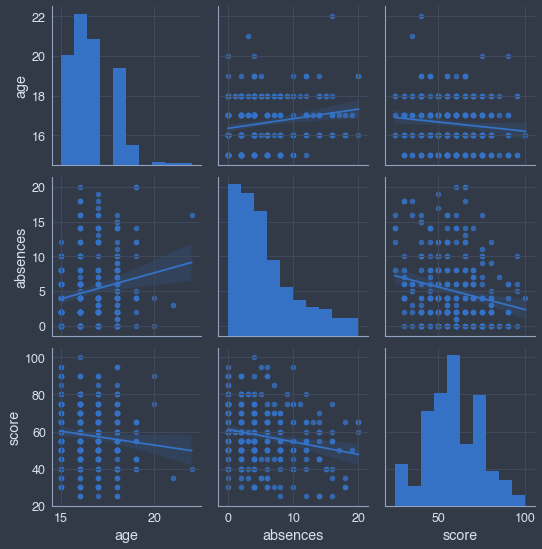

In [135]:
# quantitative
sns.pairplot(math, vars=['age', 'absences', 'score'], kind = 'reg')

In [136]:
math.age.corr(math.score)

-0.11807677146150942

In [137]:
math.absences.corr(math.score)

-0.21032665923790794

In [138]:
math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.148844,-0.173772,0.085213,-0.002852,0.231132,0.008423,0.056794,0.002217,0.109971,-0.075658,0.190766,-0.118077
Medu,-0.148844,1.000000,0.637772,-0.164789,0.059948,-0.197440,-0.076577,-0.016511,0.019874,0.061174,-0.090103,0.080964,0.170458
Fedu,-0.173772,0.637772,1.000000,-0.161071,-0.005130,-0.276366,0.003934,-0.011824,0.005251,0.013981,-0.022519,-0.018250,0.135476
traveltime,0.085213,-0.164789,-0.161071,1.000000,-0.088864,0.095835,0.093938,-0.036719,-0.001505,0.007533,-0.010407,-0.062903,-0.076520
studytime,-0.002852,0.059948,-0.005130,-0.088864,1.000000,-0.130336,-1.000000,0.028213,-0.176876,-0.057765,-0.079406,-0.084222,0.133551
failures,0.231132,-0.197440,-0.276366,0.095835,-0.130336,1.000000,0.146994,0.025000,0.134282,0.104842,0.062672,0.144808,-0.259620
"studytime, granular",0.008423,-0.076577,0.003934,0.093938,-1.000000,0.146994,1.000000,-0.042682,0.148511,0.033905,0.100450,0.091934,-0.148416
famrel,0.056794,-0.016511,-0.011824,-0.036719,0.028213,0.025000,-0.042682,1.000000,0.153648,0.036891,0.122750,-0.095070,0.057404
freetime,0.002217,0.019874,0.005251,-0.001505,-0.176876,0.134282,0.148511,0.153648,1.000000,0.320270,0.072922,0.086170,-0.013140
goout,0.109971,0.061174,0.013981,0.007533,-0.057765,0.104842,0.033905,0.036891,0.320270,1.000000,-0.018629,0.094932,-0.150083


*Так как переменные studytime и studytime, granular скоррелированы полностью, вторую можно исключить.*

In [139]:
math.drop(['studytime, granular'], inplace = True, axis = 1)

*Кроме того, наименьшее влияние на искомый показатель оказывают traveltime, famrel, freetime, health*

In [140]:
nominal = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']
categorical = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'romantic', 'famrel', 'freetime', 'goout', 'health']

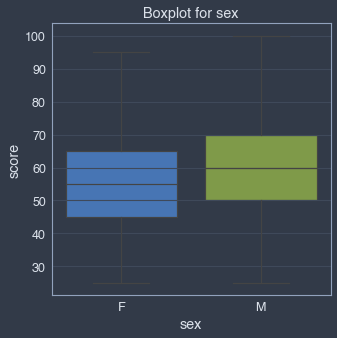

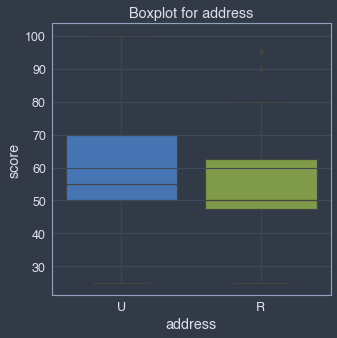

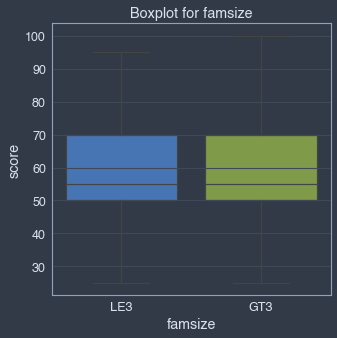

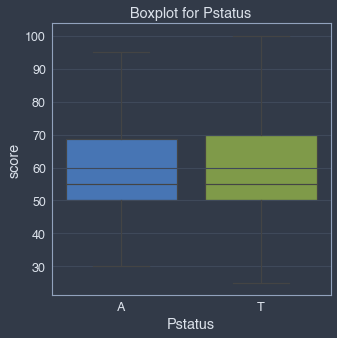

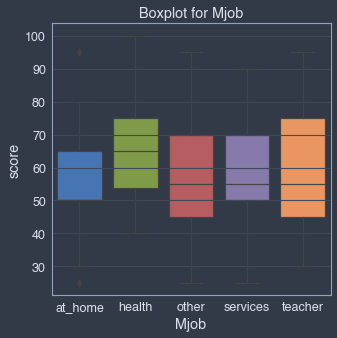

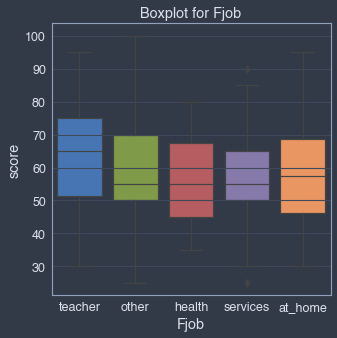

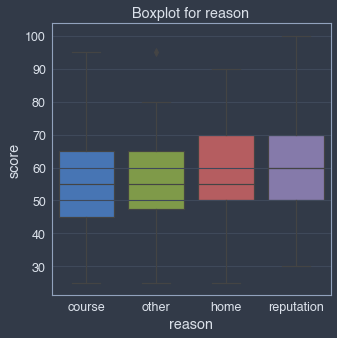

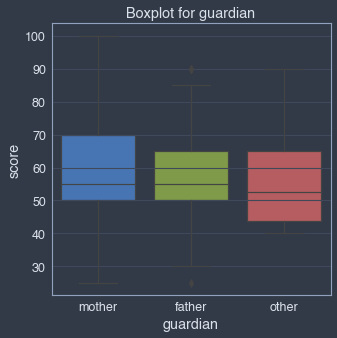

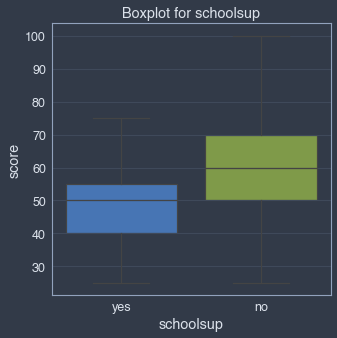

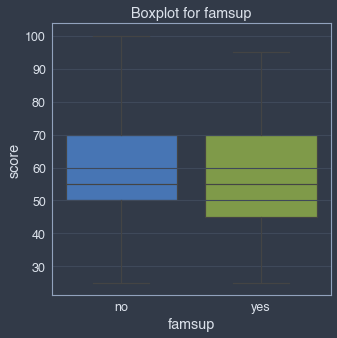

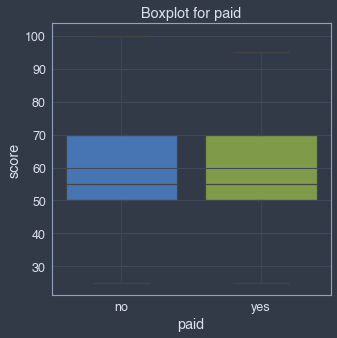

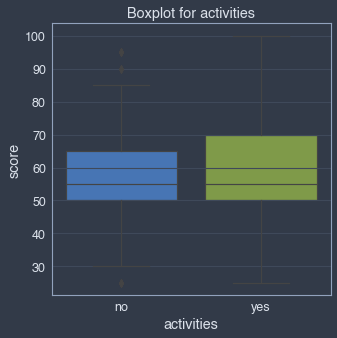

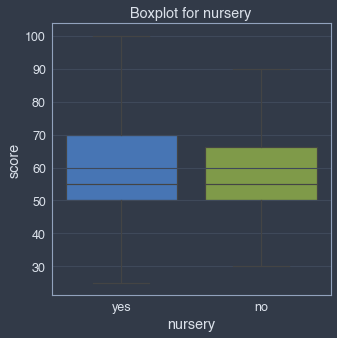

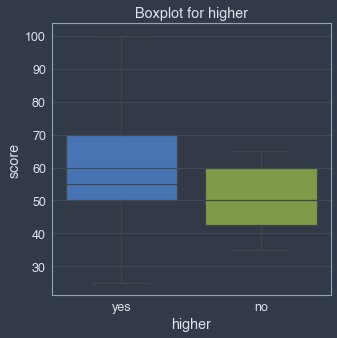

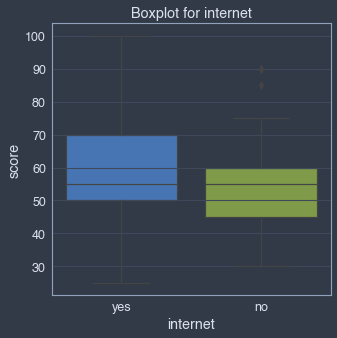

In [141]:
for col in nominal: 
    get_boxplot(col)

*Можно предположить, что параметры guardian, famsup, paid, activities, nursery почти не влияют*

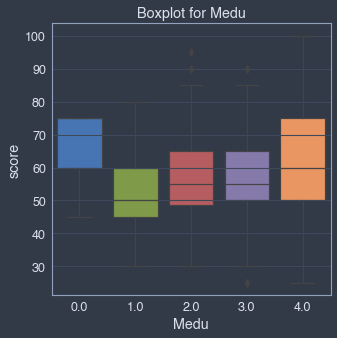

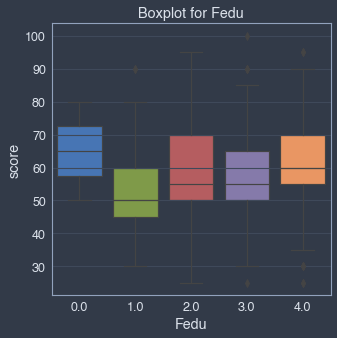

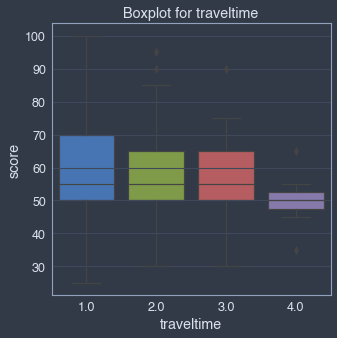

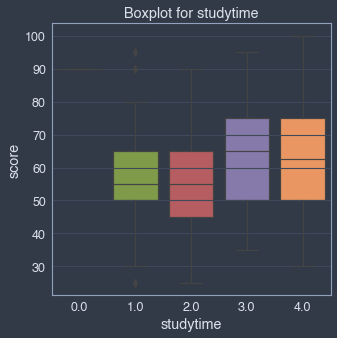

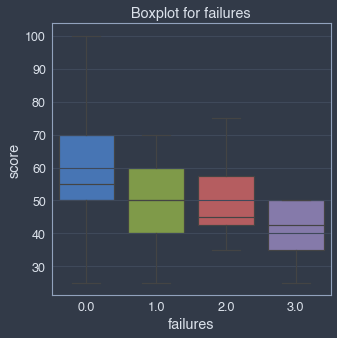

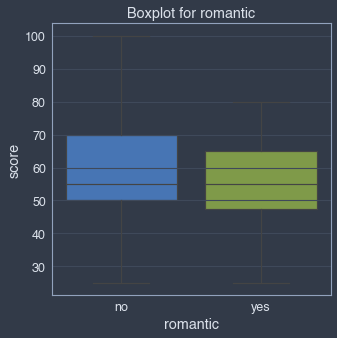

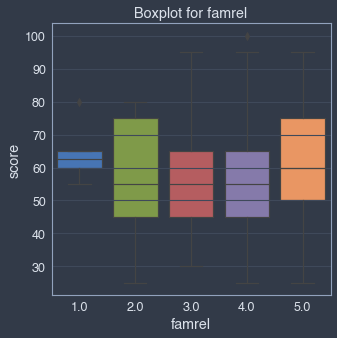

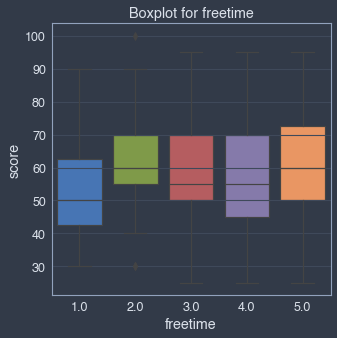

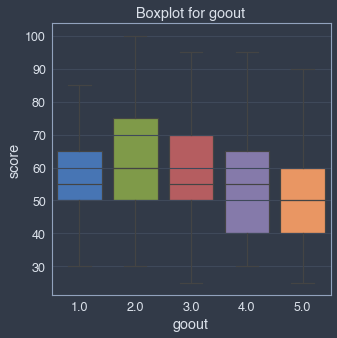

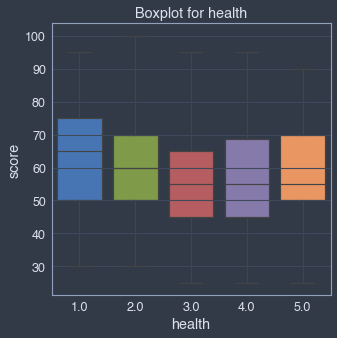

In [142]:
for col in categorical: 
    get_boxplot(col)

*Можно предположить, что параметры traveltime, romantic не влияют на score*

In [143]:
for col in nominal:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [144]:
for col in categorical:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures


Так как Medu и Fedu почти полностью скоррелированы, создадим колонку Pedu = Medu + Fedu - образование родителей от 0 до 8

In [145]:
math['Pedu'] = math['Medu'] + math['Fedu']

In [146]:
display(math)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,Pedu
0,GP,F,18,U,LE3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0,8.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,2.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0,2.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,6.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,6.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0,7.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0,4.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0,8.0
9,GP,M,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0,7.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0,8.0


#### Итоги:
---

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

В данных встречаются пустые значения, полностью заполнены только school, sex и age, остальные столбцы по отдельности имеют не очень много пропусков.

Выбросы найдены только в столбцах absences, score, Fedu.

Предложенные в ходе решения гипотезы необходимо проверить с помощью будущей модели!

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, - это absences, age, Pedu (образование обоих родителей), address, Mjob, schoolsup, studytime и failures.